In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Alexa.tsv',sep = '\t')

In [3]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
rating              3150 non-null int64
date                3150 non-null object
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df['length'] = df['verified_reviews'].apply(len)

In [7]:
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,13
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,9
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,2018-07-31,Charcoal Fabric,Music,1,5


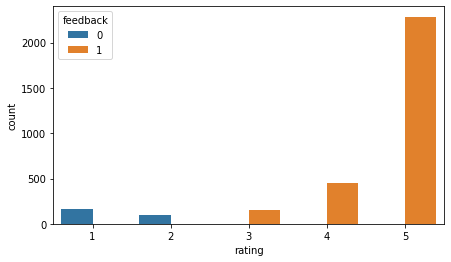

In [8]:
plt.figure(figsize=(7,4))
sns.countplot(x = 'rating', hue = 'feedback', data = df)
plt.show()

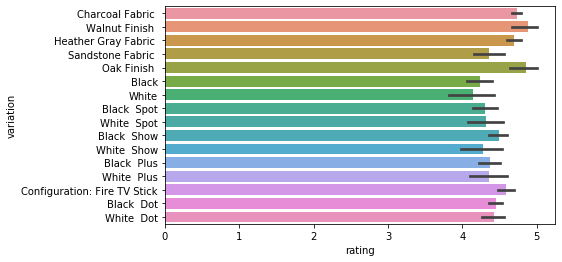

In [9]:
plt.figure(figsize=(7,4))
sns.barplot(data=df,x='rating', y='variation')
plt.show()

In [10]:
#Data cleaning

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = []


for i in range(0,3150):
    # retain alphabets
    review = re.sub('[^a-zA-Z]', ' ', df['verified_reviews'][i])
    # convert to lower case
    review=review.lower()
    # tokenize
    review=review.split()
    # initialize stemmer object
    ps=PorterStemmer()
    # perform stemming
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    # join elements of list
    review=' '.join(review)
    # add to 'corpus'
    corpus.append(review)

In [11]:
#Splitting dataset

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

cv = CountVectorizer(max_features=1500)
vector = cv.fit_transform(corpus)

X = vector.toarray()

In [12]:
y = df['feedback']
count = y.value_counts()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
#Predictor check

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

rf = RandomForestClassifier(random_state=2)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

score = accuracy_score(y_test, y_pred)
print('Accuracy',score)

precision = precision_score(y_test, y_pred)
print('Precision',precision)

Accuracy 0.9444444444444444
Precision 0.947107438016529


In [14]:
#Oversampling using SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=9)
X_train,y_train = smote.fit_sample(X_train,y_train)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

score = accuracy_score(y_test, y_pred)
print('Accuracy smote',score)

precision = precision_score(y_test, y_pred)
print('Precision smote',precision)

Accuracy smote 0.8904761904761904
Precision smote 0.9439579684763573
